<a href="https://colab.research.google.com/github/nom682025-cell/Crazi-Di/blob/main/examples/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%81%20%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC%20(%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%2C%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U lightautoml
# run code cell twice. Yes, twice and restart session after first run

In [ ]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка данных

Загружаем датасет, подготовленный на предыдущих этапах обучения.

In [ ]:
import json, requests, urllib, io
import pandas
import os

from google.colab import userdata
pao = userdata.get('GITHUB_TOKEN_BIOMED_UPSKILL')
user='AI-is-out-there'

github_session = requests.Session()
github_session.auth = (user, pao)

# providing raw url to download csv from github
csv_url = 'https://raw.githubusercontent.com/AI-is-out-there/biomed-upskill-dev/main/datasets/heart3.csv'

download = github_session.get(csv_url).content
raw_table_data = pandas.read_csv(io.StringIO(download.decode('utf-8')), header = 0)
raw_table_data.head(3)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3


In [ ]:
#смотрим размерность датасета
raw_table_data.shape

(949, 35)

# Helicopter view

In [ ]:
#смотим данные датасета в табличном виде - первые пять строк
table_data = raw_table_data
table_data.head()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3
3,0,13.0,1,0,7,0.68,0,4.9,1,3.25,...,11,0,10.0,3,31.6,0,85.000523,136.065663,1,-3
4,0,16.0,0,1,6,1.01,0,8.2,1,1.25,...,11,0,0.0,3,32.8,1,799.076099,72.024040,1,-4


In [ ]:
#статистические параметры распределения по столбцам
table_data.describe()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,...,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,0.043203,32.206533,0.523709,0.353003,6.819810,1.070095,0.335090,5.868599,0.485774,2.043393,...,11.140148,0.075869,5.886196,4.124341,28.175869,0.048472,682.750558,125.584941,0.548999,-3.320337
std,0.203422,26.942616,0.499701,0.478156,1.364942,0.368732,0.472271,1.667100,0.500061,1.704405,...,1.165774,0.264929,9.105321,0.730100,4.825009,0.214875,268.745640,60.887692,0.497856,1.507582
min,0.000000,6.000000,0.000000,0.000000,0.000000,-0.680000,0.000000,3.600000,0.000000,0.210000,...,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000,24.012056,5.048727,0.000000,-11.000000
25%,0.000000,18.000000,0.000000,0.000000,6.000000,0.850000,0.000000,4.500000,0.000000,0.860000,...,10.000000,0.000000,0.000000,4.000000,24.200000,0.000000,799.009540,80.073907,0.000000,-4.000000
50%,0.000000,20.000000,1.000000,0.000000,7.000000,1.110000,0.000000,5.200000,0.000000,1.480000,...,11.000000,0.000000,0.000000,4.000000,27.600000,0.000000,799.040754,123.007116,1.000000,-3.000000
75%,0.000000,25.000000,1.000000,1.000000,8.000000,1.340000,1.000000,7.300000,1.000000,2.690000,...,12.000000,0.000000,10.000000,5.000000,32.300000,0.000000,799.068772,136.086466,1.000000,-2.000000
max,1.000000,90.000000,1.000000,1.000000,12.000000,1.790000,1.000000,9.200000,1.000000,14.300000,...,15.000000,1.000000,40.000000,5.000000,37.000000,1.000000,799.099835,224.099724,1.000000,8.000000


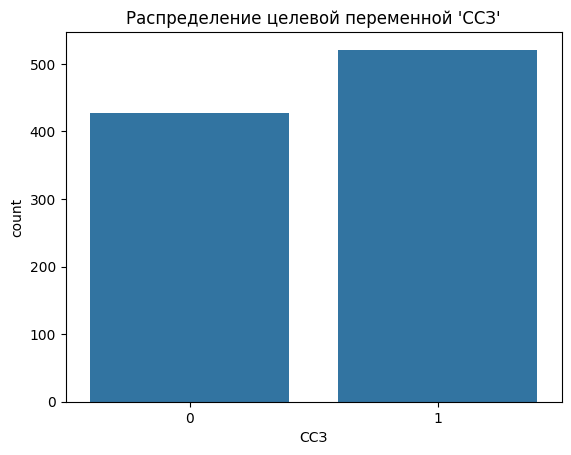

In [ ]:
#проверяем распределение целевого признака
sns.countplot(data=table_data, x="ССЗ")
plt.title("Распределение целевой переменной 'ССЗ'")
plt.show()

## Визуализация распределения значений датасета

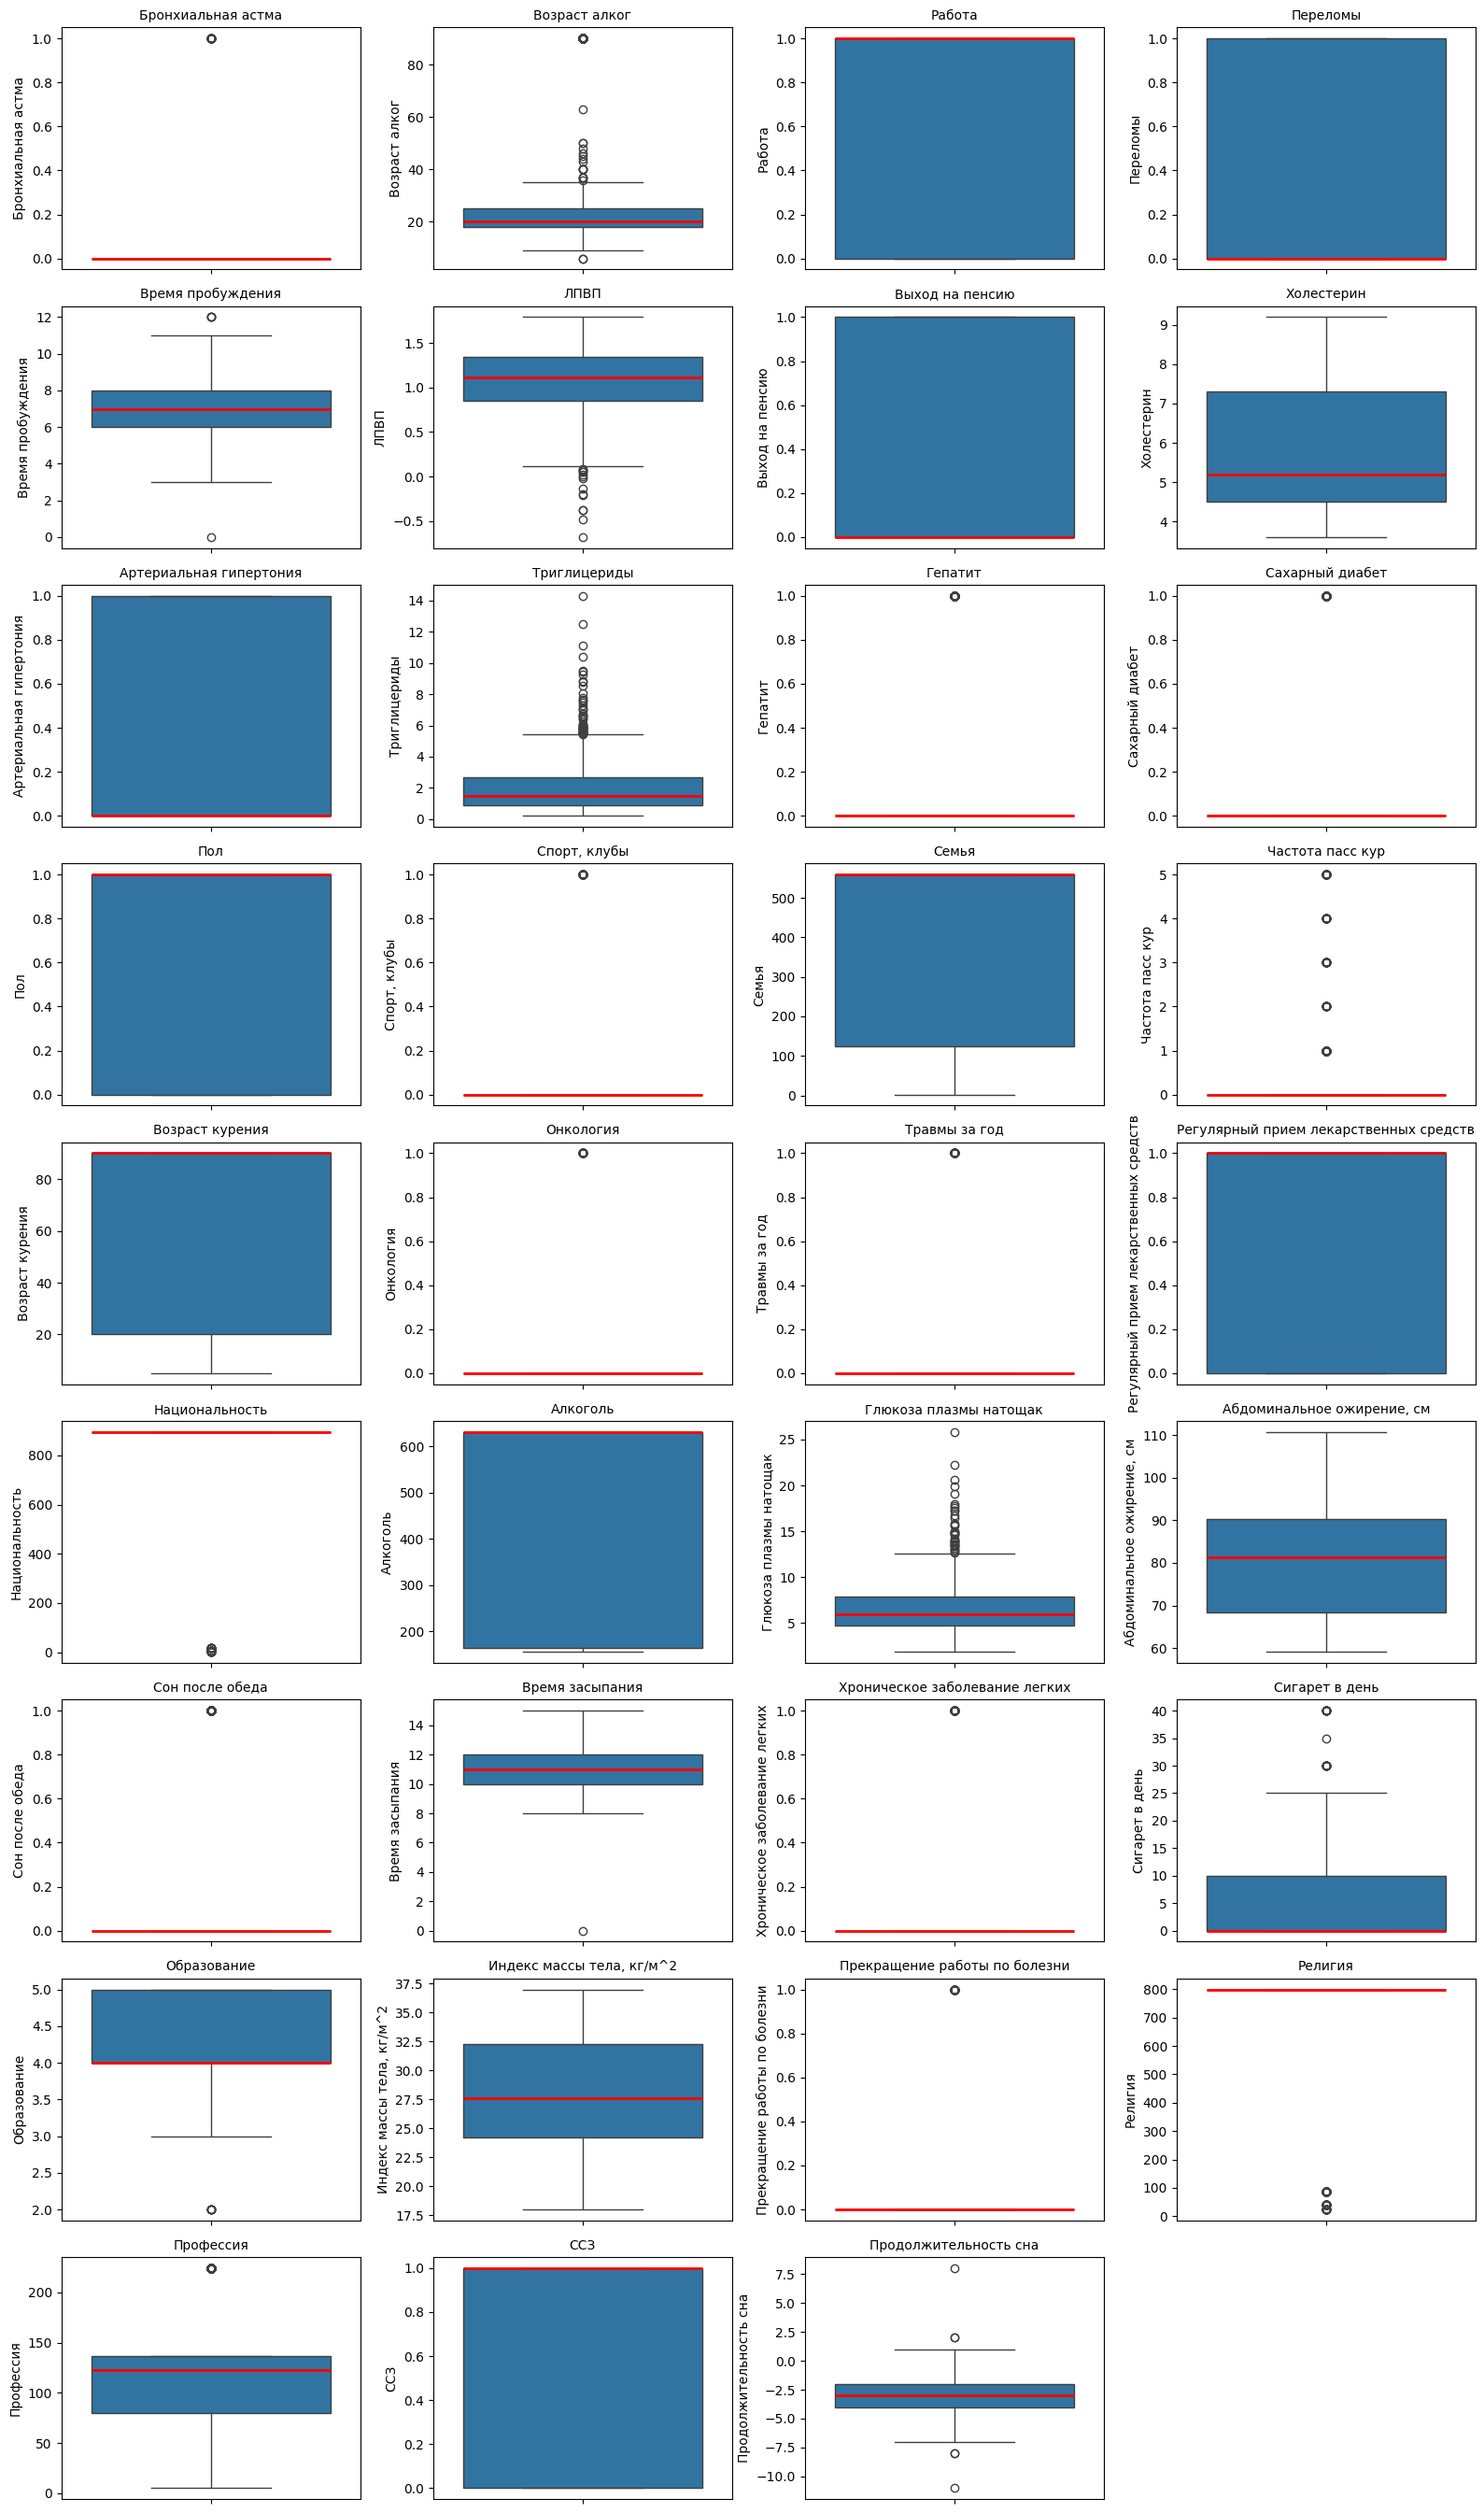

In [ ]:
n = table_data.shape[1]  # Количество столбцов
cols_per_row = 4  # Сколько графиков в одной строке
n_rows = (n + cols_per_row - 1) // cols_per_row  # Вычисляем количество строк

fig, axes = plt.subplots(
    n_rows,
    cols_per_row,
    figsize=(cols_per_row * 4, n_rows * 3),  # Размер фигуры (ширина, высота)
    squeeze=False  # Гарантирует, что axes всегда будет двумерным массивом
)

# Убираем лишние оси, если столбцов не кратно cols_per_row
for i in range(n, n_rows * cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Строим боксплоты
for i, col in enumerate(table_data.columns):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    ax = axes[row_idx, col_idx]

    sns.boxplot(
        y=table_data.iloc[:, i],
        data=table_data,
        ax=ax,
        medianprops={"color": "r", "linewidth": 2}
    )
    ax.set_title(col, fontsize=10)  # Подпись графика

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

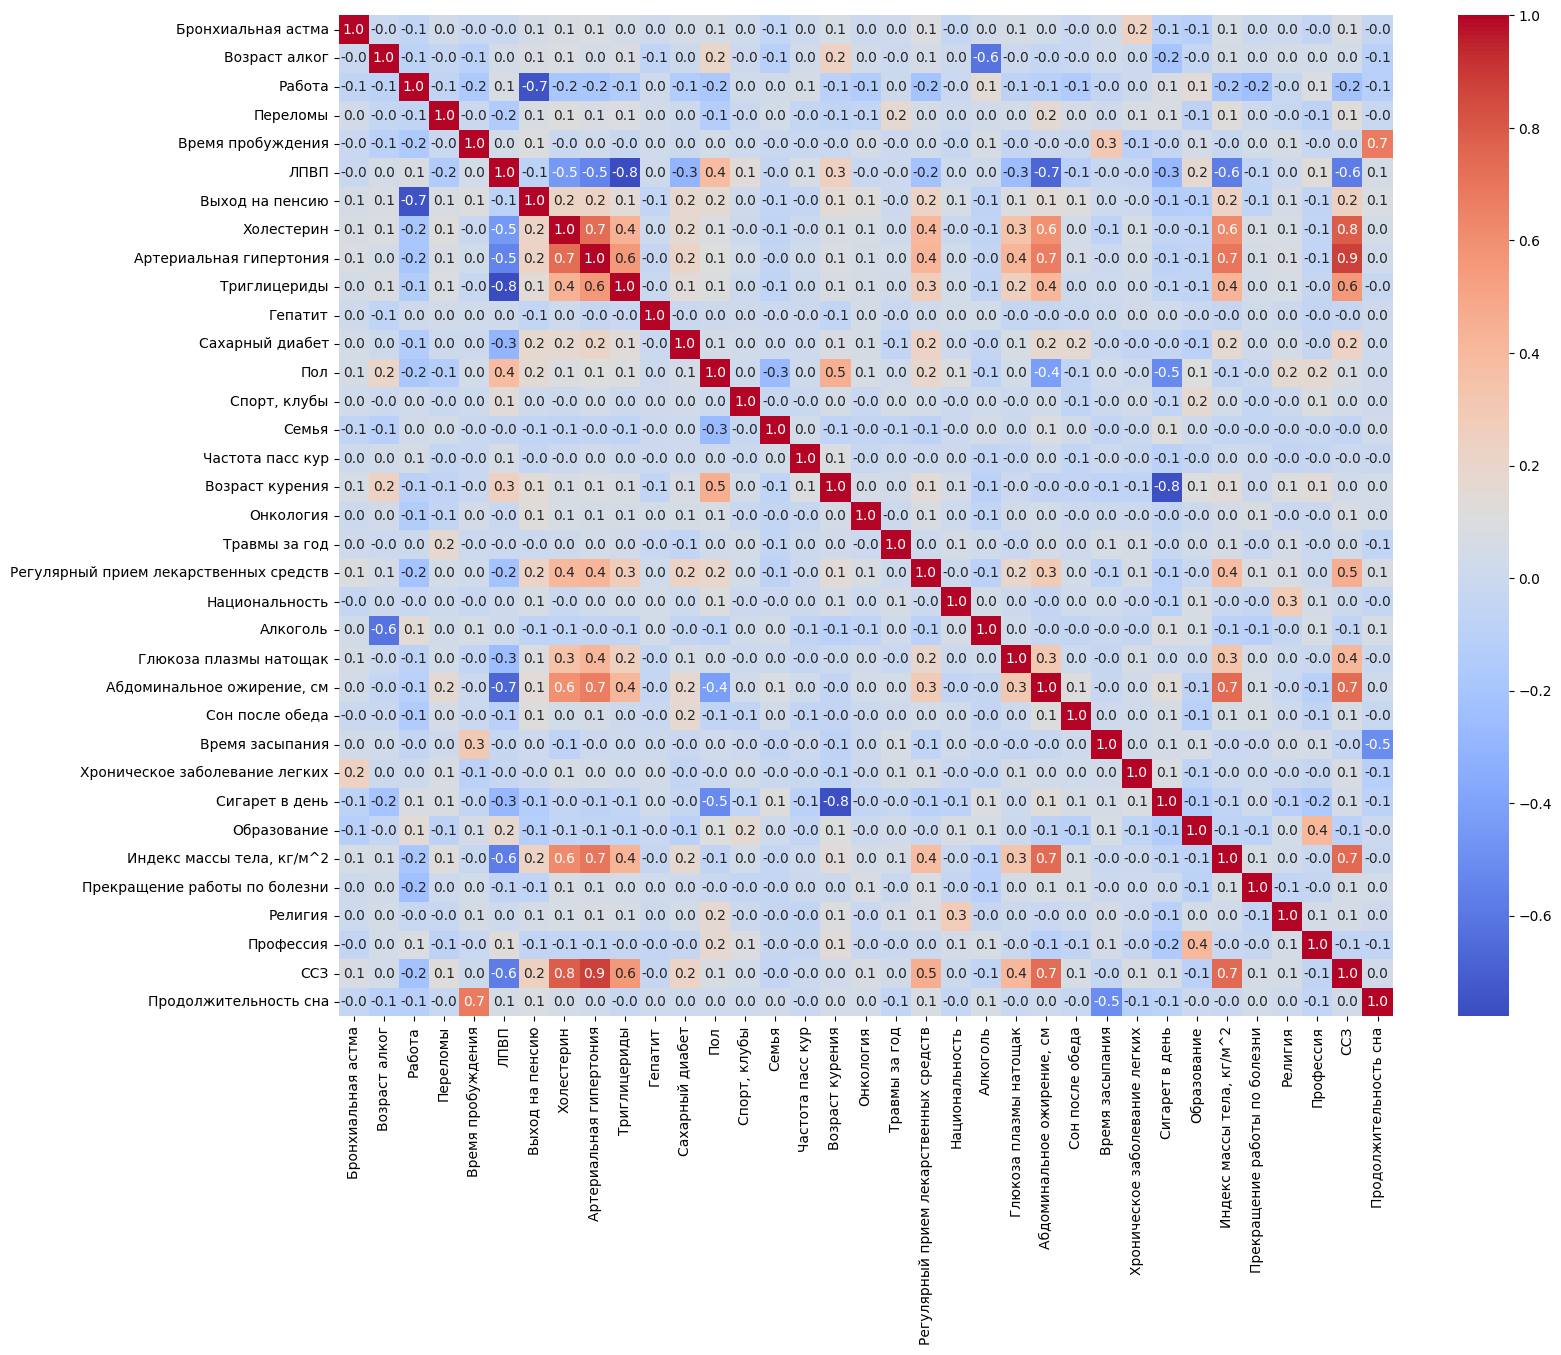

In [ ]:
#проверяем корреляцию признаков

fig = plt.figure(figsize=(17,13))
sns.heatmap(table_data.corr(),annot=True,fmt="0.1f",cmap="coolwarm")
plt.show()

Text(0.5, 1.0, 'Тепловая карта корреляции (уровень 1/2)')

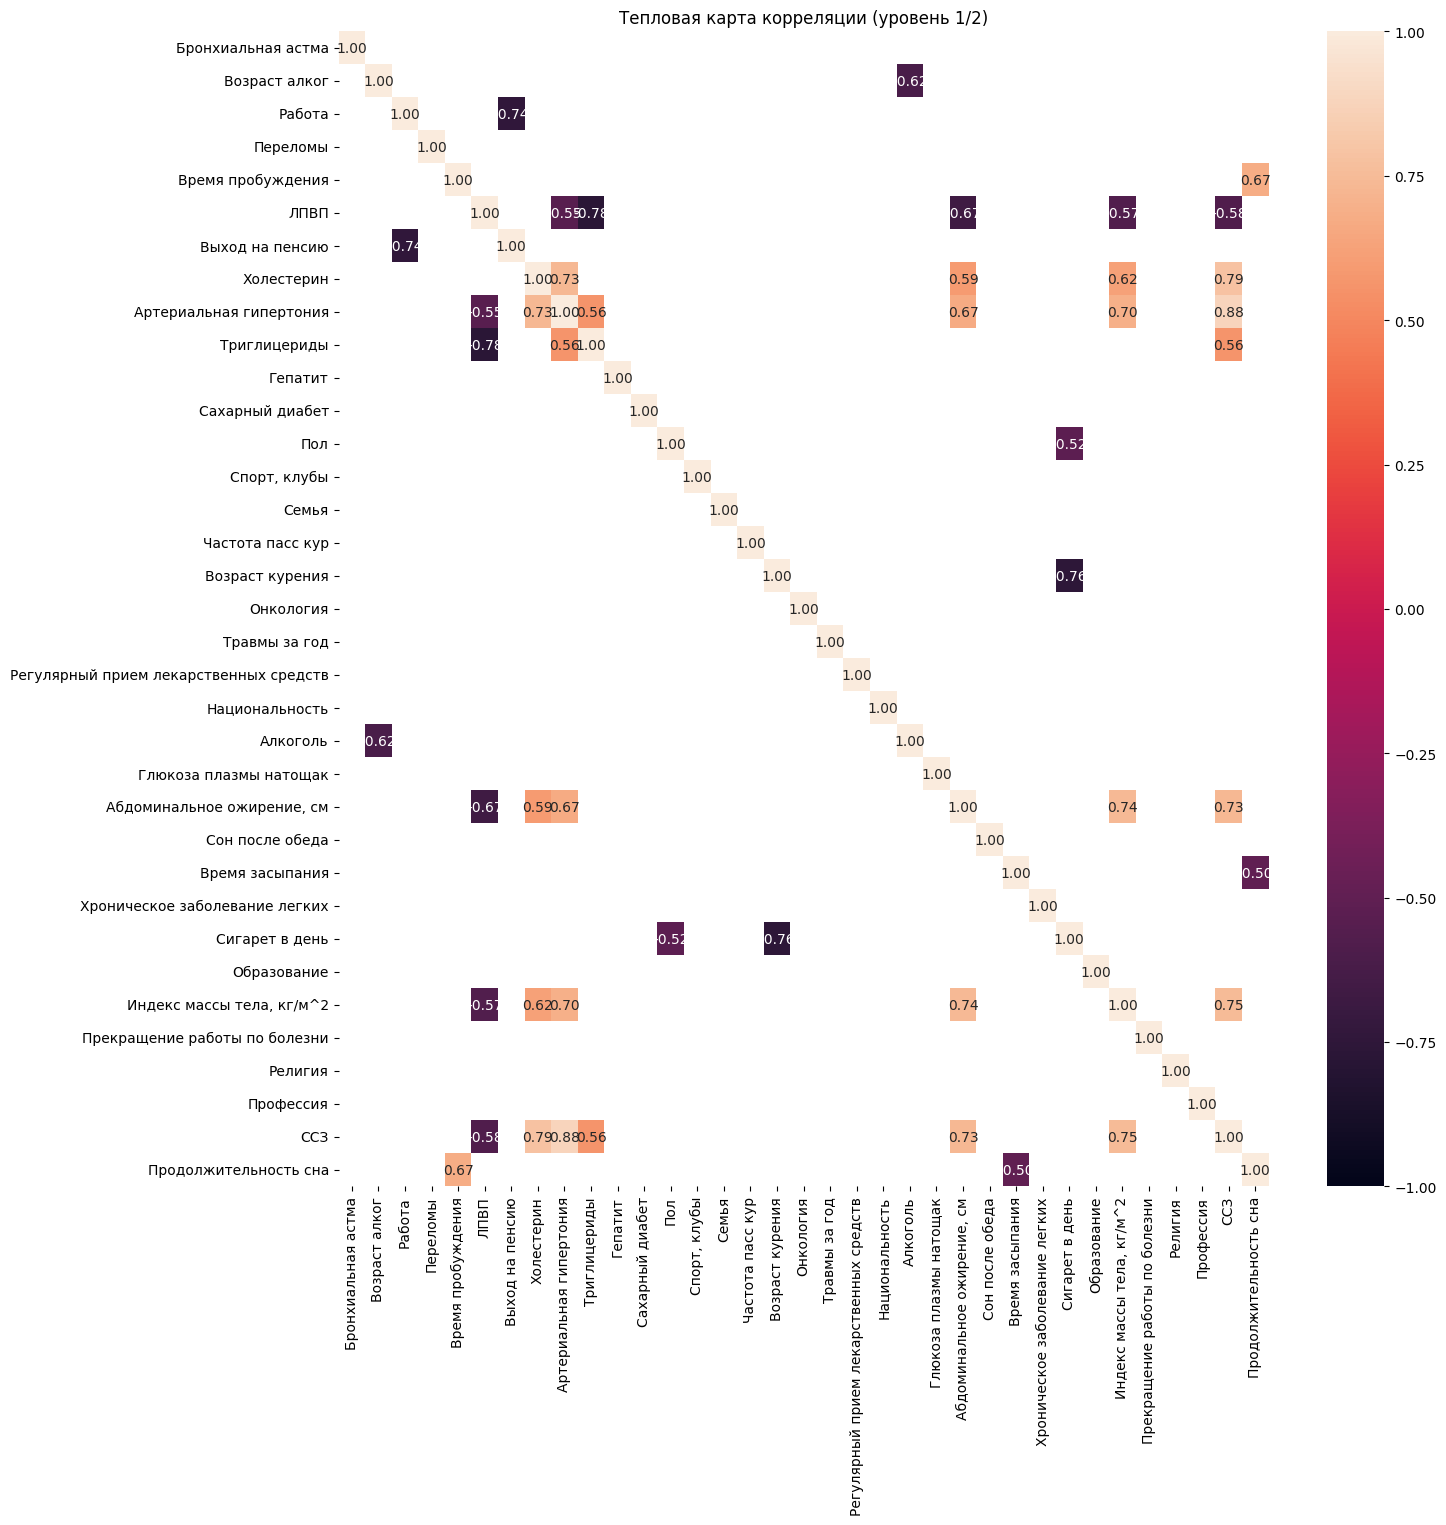

In [ ]:
#изобразим только те значения, которые имеют значительную корреляцию
df_corr_table = table_data.corr()
mask_con_corr = df_corr_table[(df_corr_table >= 0.50) | (df_corr_table <= -0.50)]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
fig = sns.heatmap(mask_con_corr, vmin=-1, vmax=1, annot=True, fmt='0.2f')
fig.set_title("Тепловая карта корреляции (уровень 1/2)")

# Методы PCA - princopal component analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
table_data_pca = table_data
#table_data_pca = table_data_pca.drop('ССЗ', axis = 1)
table_data_pca.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'ССЗ', 'Продолжительность сна'],
      dtype='object')

In [ ]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)

#pca = PCA(n_components = 2).fit(scaled_data) #количество компонет

pca = PCA(n_components = 0.7).fit(scaled_data) #значение дисперсии, которое определит необходимое количество компонент

x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(949, 35) (949, 15)


In [ ]:
percent = pca.explained_variance_ratio_
print(percent)
print(sum(percent))
#To see how much variance is preserved for each dataset.

[0.15852904 0.08517331 0.05628039 0.05279457 0.0439071  0.03957878
 0.03669781 0.03538008 0.03424808 0.03285669 0.03070995 0.03029921
 0.02929348 0.02882371 0.02699446]
0.7215666603866082


In [ ]:
def pca_explained(X, threshold):
  features = X.shape[1]
  for i in range(2, features):
    pca = PCA(n_components = i).fit(X)
    sum_ = pca.explained_variance_ratio_
    # add all components explained variances
    percent = sum(sum_)
    print('{} components at {:.2f}% explained variance'.format(i,percent*100))
    if percent > threshold:
      break

pca_explained(scaled_data, 0.85)

2 components at 24.37% explained variance
3 components at 30.00% explained variance
4 components at 35.28% explained variance
5 components at 39.67% explained variance
6 components at 43.63% explained variance
7 components at 47.30% explained variance
8 components at 50.83% explained variance
9 components at 54.26% explained variance
10 components at 57.54% explained variance
11 components at 60.62% explained variance
12 components at 63.65% explained variance
13 components at 66.57% explained variance
14 components at 69.46% explained variance
15 components at 72.16% explained variance
16 components at 74.81% explained variance
17 components at 77.32% explained variance
18 components at 79.76% explained variance
19 components at 82.07% explained variance
20 components at 84.30% explained variance
21 components at 86.49% explained variance


Text(0, 0.5, 'Second Principal Component')

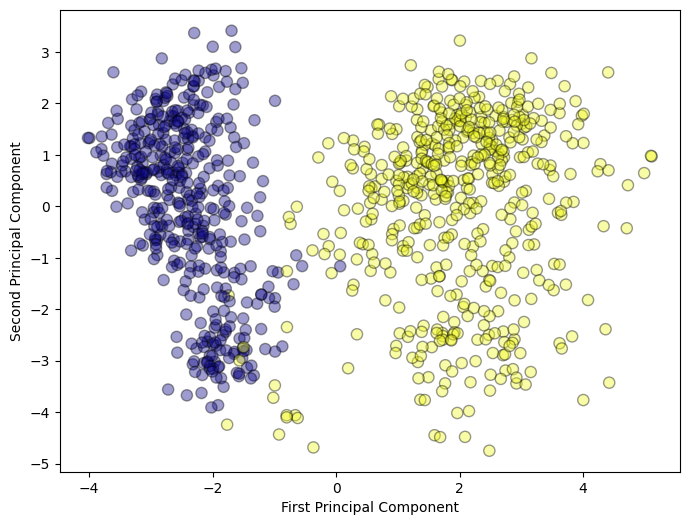

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=table_data['ССЗ'], cmap='plasma', alpha=0.4, edgecolors='black', s=65);
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#Классификация

## ML-классификация: модель GaussianNaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
# set the classification index of table
clf_index = 33

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.3,
                                                        random_state=37,
                                                        stratify=y1.values)

In [ ]:

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plt.figure(figsize=(8,6))
    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

In [ ]:
table_data.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'ССЗ', 'Продолжительность сна'],
      dtype='object')

sk Naive Bayes classifier accucacy: 0.9754385964912281
[0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1]


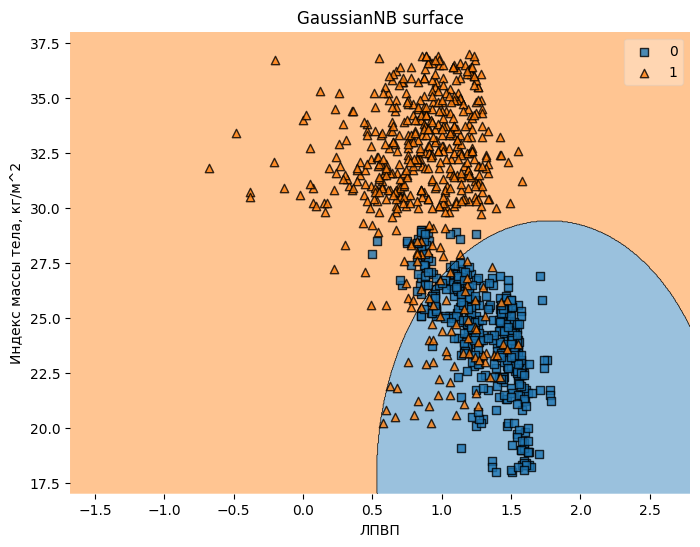

In [ ]:
sk_nb_clf = GaussianNB()
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)

print(f'sk Naive Bayes classifier accucacy: {sk_nb_clf_accuracy}')
print(sk_nb_clf_pred_res)

feature_indexes = [5, 29]
title1 = 'GaussianNB surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_nb_clf, feature_indexes, title1)

## ML - Описание классов и матрица ошибок

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
table_data.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'ССЗ', 'Продолжительность сна'],
      dtype='object')

In [ ]:
# set the classification index of table
clf_index = 33

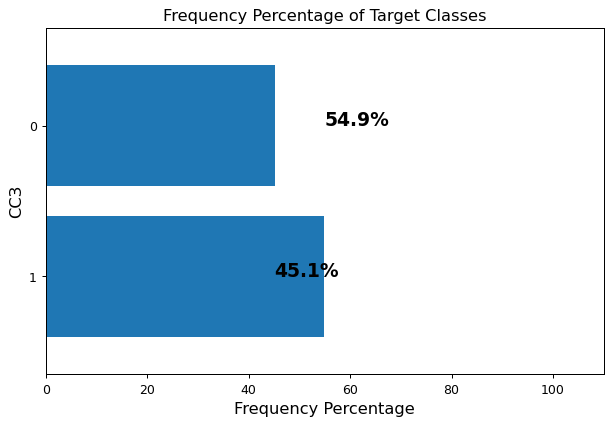

In [ ]:
plt.figure(figsize=(35,20),dpi=90)
# Plot frequency percentages barplot
table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = table_data[table_data.columns[clf_index]].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=13)
plt.ylabel(table_data.columns[clf_index], fontsize=13)
plt.title('Frequency Percentage of Target Classes', fontsize=13)
plt.show()

In [ ]:
# set the classification index of table
clf_index = 33

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y1.values)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1.values,
                                                 y1.values,
                                                 test_size=0.3,
                                                 random_state=41,
                                                 stratify=y1.values)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (664, 34)
y_train shape: (664,)
X_test shape: (285, 34)
y_test shape: (285,)


In [ ]:
GussianClassifier = GaussianNB()
GussianClassifier.fit(X1_train,y1_train)
y_pred=GussianClassifier.predict(X_test)
print("===================================> Result <===================================")
print("Accuracy                     = " ,metrics.accuracy_score(y_test,y_pred))
print("F1 Score                     = " ,metrics.f1_score(y_test,y_pred))

===================================> Result <===================================
Accuracy                     =  0.9754385964912281
F1 Score                     =  0.9773462783171522


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

              precision    recall  f1-score   support

        True       0.96      0.98      0.97       129
       False       0.99      0.97      0.98       156

    accuracy                           0.98       285
   macro avg       0.97      0.98      0.98       285
weighted avg       0.98      0.98      0.98       285



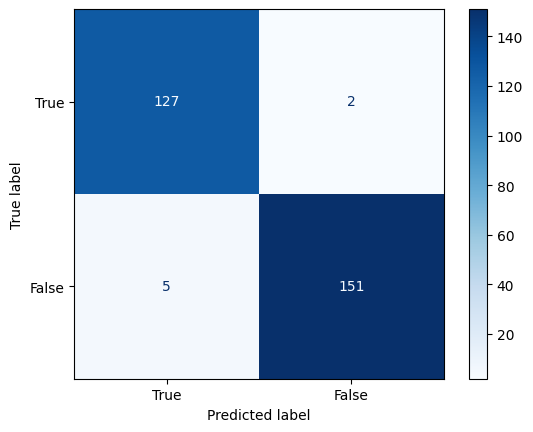

In [ ]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y_test, y_pred,labels=labels_names, target_names=target_names))
#cm = confusion_matrix(y_test, y_pred,labels=labels_names,normalize='true')
cm = confusion_matrix(y_test, y_pred,labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

##LightAutoML

In [ ]:
#%%time prints the wall time for the entire cell whereas time gives you the time for first line only
%%time
#!pip install -U lightautoml --quiet

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [ ]:
!pip install shap --quiet

In [ ]:
#!pip install --force-reinstall "numpy>=1.22,<2.0.0" --quiet


In [ ]:
# Импорт библиотек для auto ml

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco, ReportDecoUtilized
from lightautoml.addons.tabular_interpretation import SSWARM

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import torch

/usr/local/lib/python3.12/dist-packages/lightautoml/transformers/text.py:22: UserWarning: 'gensim' - package isn't installed
  warnings.warn("'gensim' - package isn't installed")


In [ ]:
N_THREADS = 4 #number of vCPUs for LightAutoML model creation
N_FOLDS = 2 # number of folds in LightAutoML inner CV
#All models that are trained during the cross-validation loop
#on different folds are then saved for the inference phase.
#Inference on new data is made by averaging models from all train folds.

RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 100 # Time in seconds for automl run
TARGET_NAME = 'ССЗ' # Target column name

np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

autoML_df = table_data

In [ ]:
train_data, test_data = train_test_split(
    autoML_df,
    test_size=TEST_SIZE,
    stratify=autoML_df[TARGET_NAME],
    random_state=RANDOM_STATE
)

print(f'Data is splitted. Parts sizes: train_data = {train_data.shape}, test_data = {test_data.shape}')

train_data.head()

Data is splitted. Parts sizes: train_data = (759, 35), test_data = (190, 35)


,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
9,0,18.0,1,0,8,1.43,0,4.3,0,0.50,...,11,0,0.0,5,25.0,0,799.036794,224.022085,0,-2
247,0,18.0,0,1,10,0.45,1,5.7,0,4.07,...,11,0,1.0,4,27.1,0,799.082164,123.018854,1,0
221,0,30.0,0,1,6,1.24,1,5.5,1,1.57,...,12,0,0.0,4,31.2,0,799.088242,16.025089,1,-5
136,0,25.0,0,0,6,1.33,1,9.2,1,0.66,...,10,0,0.0,5,33.5,0,799.060853,35.081713,1,-3
12,0,18.0,1,1,7,0.88,0,6.3,1,3.24,...,10,0,0.0,5,34.3,0,799.030560,35.017522,1,-2


In [ ]:
#The following task types are available:
#'binary' - for binary classification.
#'reg’ - for regression.
#‘multiclass’ - for multiclass classification.
#'multi:reg - for multiple regression.
#'multilabel' - for multi-label classification.

task = Task('binary')

You can also optionally specify the following roles:

'numeric' - numerical feature

'category' - categorical feature

'text' - text data

'datetime' - features with date and time

'date' - features with date only

'group' - features by which the data can be divided into groups and which can be taken into account for group k-fold validation (so the same group is not represented in both testing and training sets)

'drop' - features to drop, they will not be used in model building

'weights' - object weights for the loss and metric

'path' - image file paths (for CV tasks)

'treatment' - object group in uplift modelling tasks: treatment or control

In [ ]:
roles = {
    'target': TARGET_NAME
    #'category': TARGET_NAME
    #'drop': ['name of column']
}

In [ ]:
automl = TabularAutoML(
    task = task,
    timeout = TIMEOUT,
    cpu_limit = N_THREADS,
    reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
)

The verbose parameter accepts integer values, where a higher value indicates a greater level of verbosity:

> < 1: No messages are displayed.

> \>= 1: The computation process for different layers of the AutoML pipeline is displayed.

> \>= 2: Information about the processing of individual data folds during cross-validation is also displayed.

> \>= 3: Details about the hyperparameters optimization process are included in the output.

> \>= 4: The training process for every individual algorithm within the AutoML pipeline is displayed.

In [ ]:
out_of_fold_predictions = automl.fit_predict(train_data, roles = roles, verbose = 2)

[20:39:11] Stdout logging level is INFO2.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO2.


[20:39:11] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


[20:39:11] Task: binary



INFO:lightautoml.automl.presets.base:Task: binary



[20:39:11] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[20:39:11] - time: 100.00 seconds


INFO:lightautoml.automl.presets.base:- time: 100.00 seconds


[20:39:11] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[20:39:11] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[20:39:11] Train data shape: (759, 35)



INFO:lightautoml.reader.base:Train data shape: (759, 35)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[20:39:20] Layer 1 train process start. Time left 90.67 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 90.67 secs


[20:39:20] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 34}


[20:39:20] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.9933126276616582
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.9932846470242592
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.9933126276616582


[20:39:21] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.9943347953216374
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.9947705802968961
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.9947986954565902
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = 0.9955578047683311
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = 0.9958670715249662
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.005 score = 0.9974415204678362
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.01 score = 0.9982006297795771
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.05 score = 0.9996063877642826
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.1 score = 0.

[20:39:22] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9898677549188719


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.9898677549188719


[20:39:22] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[20:39:22] Time left 88.54 secs



INFO:lightautoml.automl.base:Time left 88.54 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.995159
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.995775
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.996139
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.997845
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's auc: 0.998377
INFO3:lightautoml.ml_algo.boost_lgbm:[600]	valid's auc: 0.998685
INFO3:lightautoml.ml_algo.boost_lgbm:[700]	valid's auc: 0.998937
INFO3:lightautoml.ml_algo.boost_lgbm:[800]	valid's auc: 0.999021
INFO3:lightautoml.ml_algo.boost_lgbm:[900]	valid's auc: 0.999077
INFO3:lightautoml.ml_algo.boost_lgbm:[1000]	valid's auc: 0.999105
INFO3:lightautoml.ml_algo.boost_lgbm:[1100]	valid's auc: 0.999161
INFO3:lightautoml.ml_algo.boost_lgbm:[1200]	valid's auc: 0.999161
INFO3:lightautoml.ml_algo.boost_lgbm:[1300]	valid's auc: 0.999161
I

[20:39:23] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[20:39:23] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42, 'verbose_eval': 100}


[20:39:23] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.995271
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.995691
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.996502
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.997678
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's auc: 0.998209
INFO3:lightautoml.ml_algo.boost_lgbm:[600]	valid's auc: 0.998629
INFO3:lightautoml.ml_algo.boost_lgbm:[700]	valid's auc: 0.998825
INFO3:lightautoml.ml_algo.boost_lgbm:[800]	valid's auc: 0.998937
INFO3:lightautoml.ml_algo.boost_lgbm:[900]	valid's auc: 0.999105
INFO3:lightautoml.ml_algo.boost_lgbm:[1000]	valid's auc: 0.999133
INFO3:lightautoml.ml_algo.boost_lgbm:[1100]	valid's auc: 0.999133
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[918]	valid

[20:39:23] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.994953
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.996008
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[5]	valid's auc: 0.996893


[20:39:23] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9954106889926656


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.9954106889926656


[20:39:23] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[20:39:23] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 16.68 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 16.68 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-851ea0d2-f602-49c4-996e-2cb7afca7701
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.995719
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.996614
INFO3:lightautoml.ml_algo.boost_lgbm:[300]	valid's auc: 0.997985
INFO3:lightautoml.ml_algo.boost_lgbm:[400]	valid's auc: 0.999328
INFO3:lightautoml.ml_algo.boost_lgbm:[500]	valid's auc: 0.99972
INFO3:lightautoml.ml_algo.boost_lgbm:[600]	valid's auc: 0.999748
INFO3:lightautoml.ml_algo.boost_lgbm:[700]	valid's auc: 0.999776
INFO3:lightautoml.ml_algo.boost_lgbm:[800]	valid's auc: 0.999776
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best it

[20:39:40] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed


[20:39:40] The set of hyperparameters {'feature_fraction': 0.6844538904907915, 'num_leaves': 116, 'bagging_fraction': 0.9385038468234406, 'min_sum_hessian_in_leaf': 0.7955110174517765, 'reg_alpha': 4.79854120351961e-07, 'reg_lambda': 4.0879036068389106e-05}
 achieve 1.0000 auc


INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'feature_fraction': 0.6844538904907915, 'num_leaves': 116, 'bagging_fraction': 0.9385038468234406, 'min_sum_hessian_in_leaf': 0.7955110174517765, 'reg_alpha': 4.79854120351961e-07, 'reg_lambda': 4.0879036068389106e-05}
 achieve 1.0000 auc


[20:39:40] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.05, 'num_leaves': 116, 'feature_fraction': 0.6844538904907915, 'bagging_fraction': 0.9385038468234406, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 4.79854120351961e-07, 'reg_lambda': 4.0879036068389106e-05, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 100, 'random_state': 42, 'verbose_eval': 100, 'min_sum_hessian_in_leaf': 0.7955110174517765}


[20:39:40] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.999776
INFO3:lightautoml.ml_algo.boost_lgbm:[200]	valid's auc: 0.99958
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[109]	valid's auc: 0.999916


[20:39:40] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 100 rounds
INFO3:lightautoml.ml_algo.boost_lgbm:[100]	valid's auc: 0.999663
INFO3:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[94]	valid's auc: 0.999663


[20:39:40] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.9998176897078828


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.9998176897078828


[20:39:40] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed


[20:39:40] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 500, 'learning_rate': 0.02, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}


[20:39:40] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9567000	best: 0.9567000 (0)	total: 48.5ms	remaining: 24.2s
INFO3:lightautoml.ml_algo.boost_cb:100:	test: 0.9997482	best: 0.9997482 (97)	total: 171ms	remaining: 674ms
INFO3:lightautoml.ml_algo.boost_cb:200:	test: 0.9999440	best: 0.9999440 (153)	total: 289ms	remaining: 429ms
INFO3:lightautoml.ml_algo.boost_cb:300:	test: 0.9999720	best: 0.9999720 (224)	total: 420ms	remaining: 278ms
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.9999720194
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 224
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 225 iterations.


[20:39:41] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9746823	best: 0.9746823 (0)	total: 1.31ms	remaining: 655ms
INFO3:lightautoml.ml_algo.boost_cb:100:	test: 0.9996907	best: 0.9998875 (22)	total: 117ms	remaining: 461ms
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.9998875394
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 22
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 23 iterations.


[20:39:41] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9975878945966034


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.9975878945966034


[20:39:41] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed


[20:39:41] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 48.19 secs


INFO:lightautoml.ml_algo.tuning.optuna:Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 48.19 secs
Optimization Progress:   0%|          | 0/101 [00:00<?, ?it/s]INFO:optuna.storages._in_memory:A new study created in memory with name: no-name-ac039488-251e-4373-8e79-1b20bdea19d3
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9569098	best: 0.9569098 (0)	total: 1.11ms	remaining: 553ms
INFO3:lightautoml.ml_algo.boost_cb:100:	test: 0.9998881	best: 0.9998881 (90)	total: 87.5ms	remaining: 346ms
INFO3:lightautoml.ml_algo.boost_cb:200:	test: 0.9999440	best: 0.9999440 (180)	total: 178ms	remaining: 265ms
INFO3:lightautoml.ml_algo.boost_cb:300:	test: 0.9999720	best: 0.9999720 (225)	total: 265ms	remaining: 175ms
INFO3:lightautoml.ml_algo.boost_cb:400:	test: 1.0000000	best: 1.0000000 (311)	total: 354ms	remaining: 87.5ms
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 1
IN

[20:40:29] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed



INFO:lightautoml.ml_algo.tuning.optuna:Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed


[20:40:29] The set of hyperparameters {'max_depth': 4, 'l2_leaf_reg': 3.6010467344475403, 'min_data_in_leaf': 15}
 achieve 1.0000 auc


INFO2:lightautoml.ml_algo.tuning.optuna:The set of hyperparameters {'max_depth': 4, 'l2_leaf_reg': 3.6010467344475403, 'min_data_in_leaf': 15}
 achieve 1.0000 auc


[20:40:29] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task_type': 'CPU', 'thread_count': 2, 'random_seed': 42, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 3.6010467344475403, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 4, 'min_data_in_leaf': 15, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'boost_from_average': True, 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': 100, 'allow_writing_files': False, 'verbose_eval': 100}


[20:40:29] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9569098	best: 0.9569098 (0)	total: 1.36ms	remaining: 4.1s
INFO3:lightautoml.ml_algo.boost_cb:100:	test: 0.9999440	best: 0.9999440 (82)	total: 215ms	remaining: 6.17s
INFO3:lightautoml.ml_algo.boost_cb:200:	test: 1.0000000	best: 1.0000000 (188)	total: 497ms	remaining: 6.93s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 1
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 188
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 189 iterations.


[20:40:30] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====


INFO2:lightautoml.ml_algo.base:===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
INFO3:lightautoml.ml_algo.boost_cb:0:	test: 0.9777890	best: 0.9777890 (0)	total: 1.54ms	remaining: 4.61s
INFO3:lightautoml.ml_algo.boost_cb:100:	test: 0.9996064	best: 0.9997188 (37)	total: 165ms	remaining: 4.74s
INFO3:lightautoml.ml_algo.boost_cb:Stopped by overfitting detector  (100 iterations wait)
INFO3:lightautoml.ml_algo.boost_cb:bestTest = 0.9997188484
INFO3:lightautoml.ml_algo.boost_cb:bestIteration = 37
INFO3:lightautoml.ml_algo.boost_cb:Shrink model to first 38 iterations.


[20:40:30] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.9998737851823803


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.9998737851823803


[20:40:30] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed


[20:40:30] Time left 20.51 secs



INFO:lightautoml.automl.base:Time left 20.51 secs



[20:40:30] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[20:40:30] Blending: optimization starts with equal weights. Score = 0.9998457


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights. Score = 0.9998457


[20:40:30] Blending: iteration 0: score = 0.9999159, weights = [0.16998006 0.13797848 0.         0.13911675 0.55292475]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.9999159, weights = [0.16998006 0.13797848 0.         0.13911675 0.55292475]


[20:40:31] Blending: iteration 1: score = 0.9999229, weights = [0.20605797 0.13690661 0.09127107 0.17637783 0.38938653]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.9999229, weights = [0.20605797 0.13690661 0.09127107 0.17637783 0.38938653]


[20:40:31] Blending: iteration 2: score = 0.9999299, weights = [0.24439573 0.13029568 0.08686379 0.16786093 0.3705839 ]


INFO:lightautoml.automl.blend:Blending: iteration 2: score = 0.9999299, weights = [0.24439573 0.13029568 0.08686379 0.16786093 0.3705839 ]


[20:40:31] Blending: iteration 3: score = 0.9999439, weights = [0.35831797 0.1043831  0.         0.219543   0.31775594]


INFO:lightautoml.automl.blend:Blending: iteration 3: score = 0.9999439, weights = [0.35831797 0.1043831  0.         0.219543   0.31775594]


[20:40:31] Blending: no improvements for score. Terminated.



INFO:lightautoml.automl.blend:Blending: no improvements for score. Terminated.



[20:40:31] Blending: best score = 0.9999439, best weights = [0.35831797 0.1043831  0.         0.219543   0.31775594]


INFO:lightautoml.automl.blend:Blending: best score = 0.9999439, best weights = [0.35831797 0.1043831  0.         0.219543   0.31775594]


[20:40:31] Automl preset training completed in 80.38 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 80.38 seconds



[20:40:31] Model description:
Final prediction for new objects (level 0) = 
	 0.35832 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.10438 * (2 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.21954 * (2 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.31776 * (2 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.35832 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.10438 * (2 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.21954 * (2 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.31776 * (2 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 



In [ ]:
test_predictions = automl.predict(test_data).data
print(f'Prediction for test_data:\n{test_predictions}\nShape = {test_predictions.shape}')
#plt.plot(test_predictions.data[:],'.')

Prediction for test_data:
[[0.15339953]
 [0.15857784]
 [0.21332237]
 [0.15529476]
 [0.88580555]
 [0.88725555]
 [0.16213764]
 [0.22919104]
 [0.8893987 ]
 [0.8901415 ]
 [0.16659075]
 [0.8883979 ]
 [0.88716984]
 [0.16139159]
 [0.8555907 ]
 [0.18479727]
 [0.15933679]
 [0.30453023]
 [0.15775809]
 [0.16063994]
 [0.89066356]
 [0.865216  ]
 [0.8873086 ]
 [0.7987328 ]
 [0.18714432]
 [0.88223165]
 [0.15481983]
 [0.15432212]
 [0.88388735]
 [0.15512651]
 [0.20962043]
 [0.16086946]
 [0.16885647]
 [0.8888148 ]
 [0.8880012 ]
 [0.81989396]
 [0.88901156]
 [0.15539981]
 [0.6808417 ]
 [0.8832501 ]
 [0.88990366]
 [0.8887259 ]
 [0.1671562 ]
 [0.19332953]
 [0.8676964 ]
 [0.14990084]
 [0.88833445]
 [0.8877001 ]
 [0.8695431 ]
 [0.15882902]
 [0.15545313]
 [0.16445097]
 [0.88594663]
 [0.88491285]
 [0.8498056 ]
 [0.19631836]
 [0.8873041 ]
 [0.16560978]
 [0.8867751 ]
 [0.18726836]
 [0.88951623]
 [0.8756875 ]
 [0.8834444 ]
 [0.18636051]
 [0.16355675]
 [0.8385352 ]
 [0.889665  ]
 [0.19648796]
 [0.8908376 ]
 [0.8816

In [ ]:
test_data.head()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
681,0,18.0,1,1,7,1.38,0,3.9,0,1.74,...,12,0,0.0,5,22.9,0,799.064782,123.096776,0,-4
409,0,90.0,0,1,8,1.43,1,4.5,0,1.19,...,12,0,0.0,5,24.7,0,799.061707,224.069207,0,-3
250,0,25.0,1,1,4,0.75,0,4.1,0,1.51,...,11,0,20.0,4,28.5,0,799.049421,89.010189,0,-6
682,0,20.0,1,0,6,1.41,0,4.1,0,1.25,...,10,0,0.0,4,24.9,0,799.012292,136.043974,0,-3
28,0,20.0,1,0,7,1.11,0,6.0,1,1.78,...,11,0,0.0,4,36.3,0,799.058820,123.047634,1,-3


In [ ]:
# Порог отсечения - 0.5
for i in range(len(test_predictions)):
  if test_predictions[i] > 0.5:
    test_predictions[i] = 1
  else:
    test_predictions[i] = 0

# Вычисляем F1-меру с помощью confusion matrix
cm = confusion_matrix(test_data['ССЗ'], test_predictions)
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
Accuracy = (TP + TN) / (TP + TN + FN + FP)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print("Confusion matrix:", cm)
print("F1-Score: ", "{:.2f}".format(f1_score))
print("Accuracy:", "{:.2f}".format(Accuracy))
print("Recall: ", r"{:.2f}".format(recall))
print("Precision: ","{:.2f}".format(precision))

Confusion matrix: [[ 86   0]
 [  0 104]]
F1-Score:  1.00
Accuracy: 1.00
Recall:  1.00
Precision:  1.00


In [ ]:
print(automl.create_model_str_desc())

Final prediction for new objects (level 0) = 
	 0.35832 * (2 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.10438 * (2 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) +
	 0.21954 * (2 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost) +
	 0.31776 * (2 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost) 


In [ ]:
RD = ReportDeco(output_path = 'tabularAutoML_model_report')

automl_rd = RD(
    TabularAutoML(
        task = task,
        timeout = TIMEOUT,
        cpu_limit = N_THREADS,
        reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE}
    )
)

In [ ]:
out_of_fold_predictions = automl_rd.fit_predict(train_data, roles = roles, verbose = 0)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: binary

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 100.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (759, 35)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 99.77 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 34}
INFO2:lightautoml.ml_algo.base:===== Start wor

In [ ]:
!ls tabularAutoML_model_report

feature_importance.png		  valid_pr_curve.png
lama_interactive_report.html	  valid_preds_distribution_by_bins.png
valid_distribution_of_logits.png  valid_roc_curve.png
valid_pie_f1_metric.png


### SHAP feature importance

CPU times: user 156 ms, sys: 46.7 ms, total: 203 ms
Wall time: 160 ms


<Axes: xlabel='Feature'>

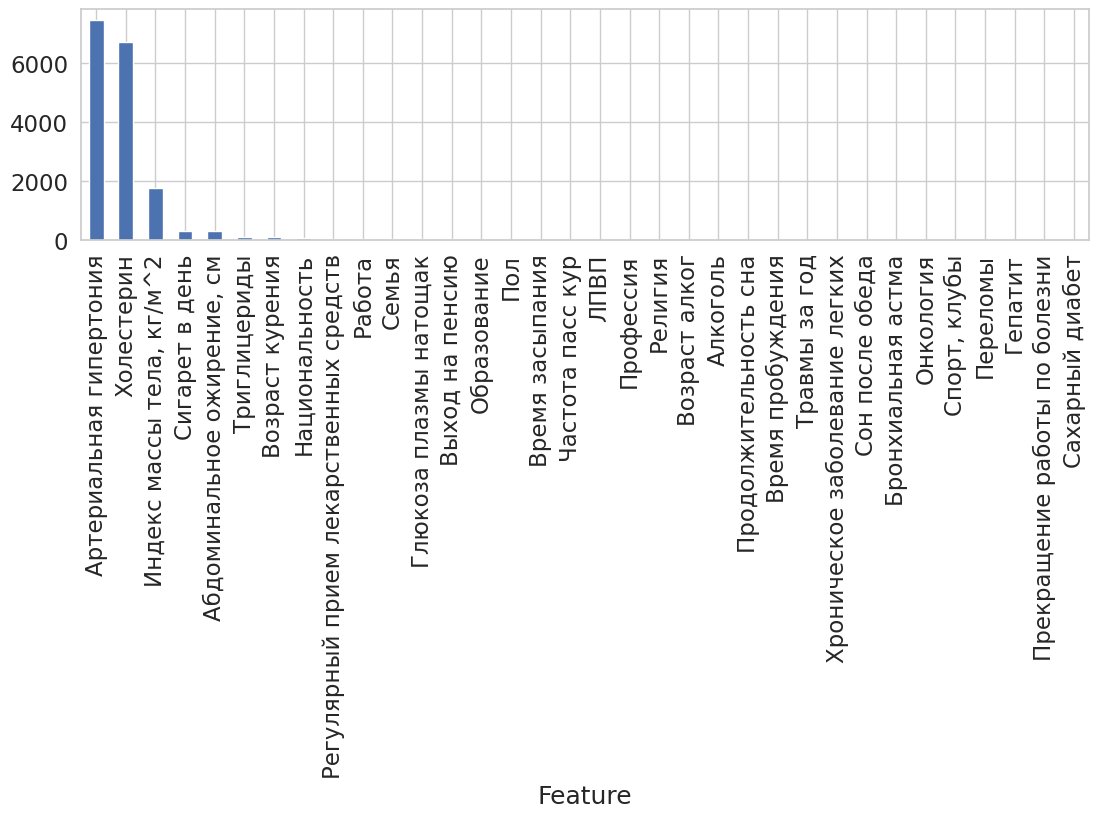

In [ ]:
%%time

# Fast feature importances calculation
# we will use automl_rd.model instead automl_rd because
# we want to take the importances from the model, not from the report.

fast_fi = automl_rd.model.get_feature_scores('fast')
#fast_fi = automl.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (13, 3), grid = True)

CPU times: user 2.16 s, sys: 441 ms, total: 2.6 s
Wall time: 2.04 s


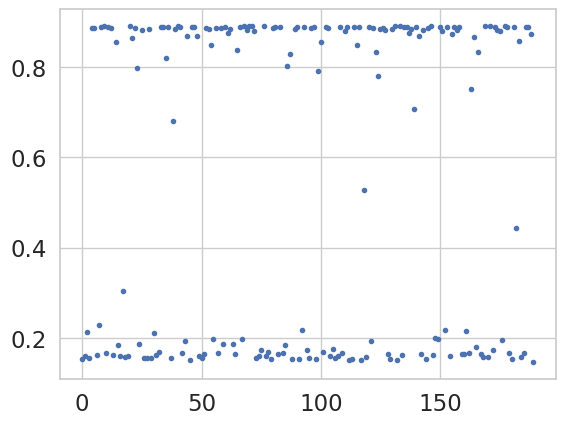

In [ ]:
%%time
test_predictions = automl_rd.predict(test_data)
#test_predictions = automl.predict(test_data)
#print(f'Prediction for test_data:\n{test_predictions}\nShape = {test_predictions.shape}')
plt.plot(test_predictions.data[:],'.')

In [ ]:
#print(f'OOF score: {roc_auc_score(train_data[TARGET_NAME].values, out_of_fold_predictions.data[:, 0])}')
print(f'HOLDOUT score: {roc_auc_score(test_data[TARGET_NAME].values, test_predictions.data[:, 0])}')

HOLDOUT score: 1.0


In [ ]:
import shap


In [ ]:
explainer = SSWARM(automl_rd.model)
shap_values = explainer.shap_values(test_data, n_jobs=N_THREADS)

100%|██████████| 3000/3000 [00:55<00:00, 54.48it/s] 


In [ ]:
X_test = test_data
X_test.reset_index(drop=['index'], inplace=True)
X_test = X_test.drop(columns=TARGET_NAME)
X_test.reset_index(drop=['index'], inplace=True)

In [ ]:
pd.DataFrame(shap_values[0], columns=X_test.columns).head()

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,Продолжительность сна
0,0.025596,0.011725,0.000868,0.163727,0.004566,0.004761,0.003678,0.017082,-0.009954,0.002792,...,-0.027231,0.022504,0.001613,0.145590,-0.038395,-0.001806,0.016632,0.020609,-0.016688,0.031892
1,-0.011790,0.011558,-0.010038,0.170423,-0.027426,-0.000784,0.000851,-0.002213,-0.000796,0.007439,...,-0.003696,0.034952,0.005479,0.131847,-0.011644,0.025773,0.042173,-0.017332,-0.008714,0.056150
2,0.005552,0.005302,-0.004570,0.206977,0.000082,0.008090,-0.002189,0.014008,-0.047651,-0.007064,...,-0.016842,0.006317,-0.015575,0.154600,-0.023878,0.037751,-0.001577,0.001808,0.007087,0.011834
3,0.001897,0.003140,0.007558,0.199662,-0.004752,-0.000489,0.003205,-0.013791,-0.039442,0.040945,...,-0.026744,0.010964,0.002823,0.150385,-0.025984,0.009663,-0.008658,0.020430,0.002404,0.033236
4,-0.020798,0.005847,0.006930,-0.057094,0.003820,-0.009448,0.007598,-0.028910,-0.026766,-0.003857,...,0.013017,-0.027850,-0.003731,-0.088272,-0.001138,-0.016037,0.002325,0.000817,-0.005073,-0.045589


/tmp/ipython-input-1330945525.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[0], test_data[list(explainer.used_feats)])


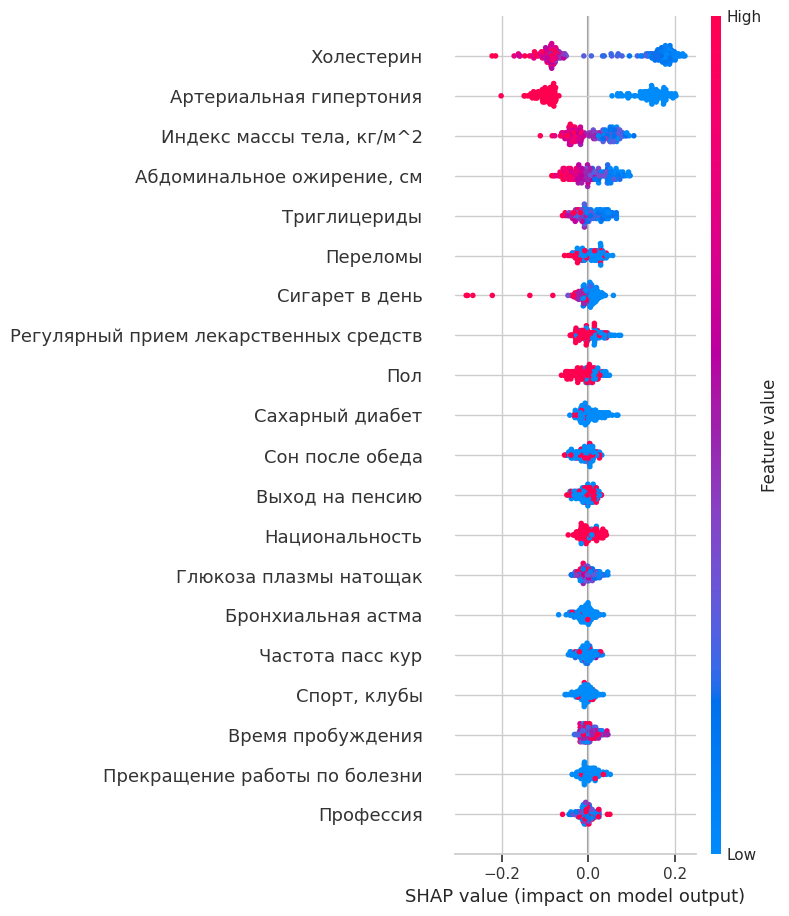

In [ ]:
# summary plot
import shap
shap.summary_plot(shap_values[0], test_data[list(explainer.used_feats)])

In [ ]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Base Value:', explainer.expected_value)

Base Value: [0.44560245 0.5543974 ]


/tmp/ipython-input-4263125957.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[0], X_test, plot_type='bar')


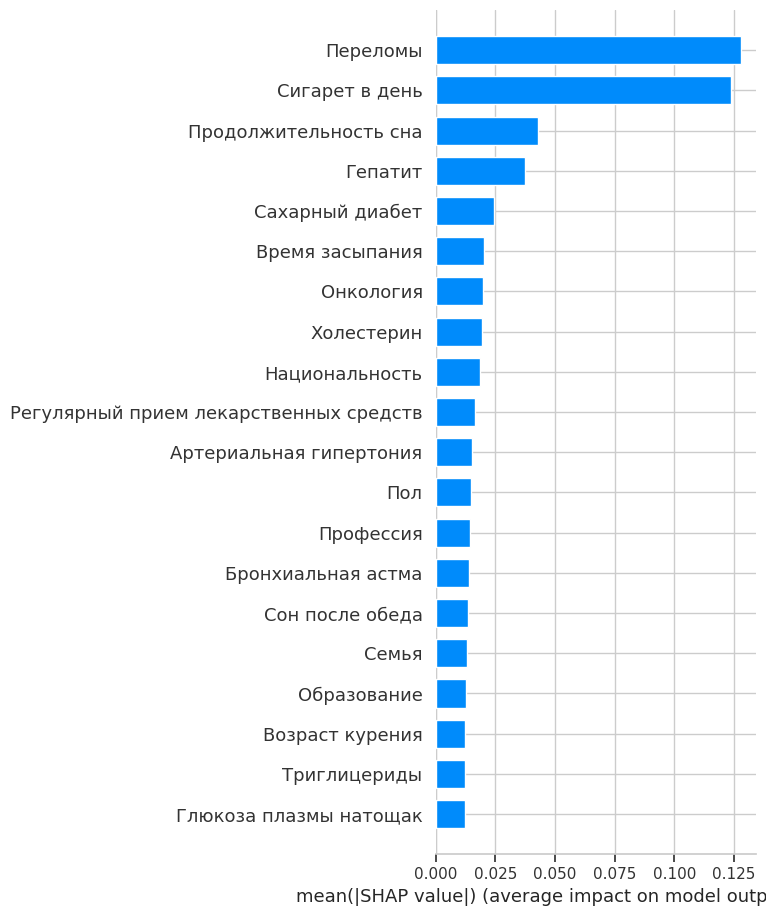

In [ ]:
shap.summary_plot(shap_values[0], X_test, plot_type='bar')

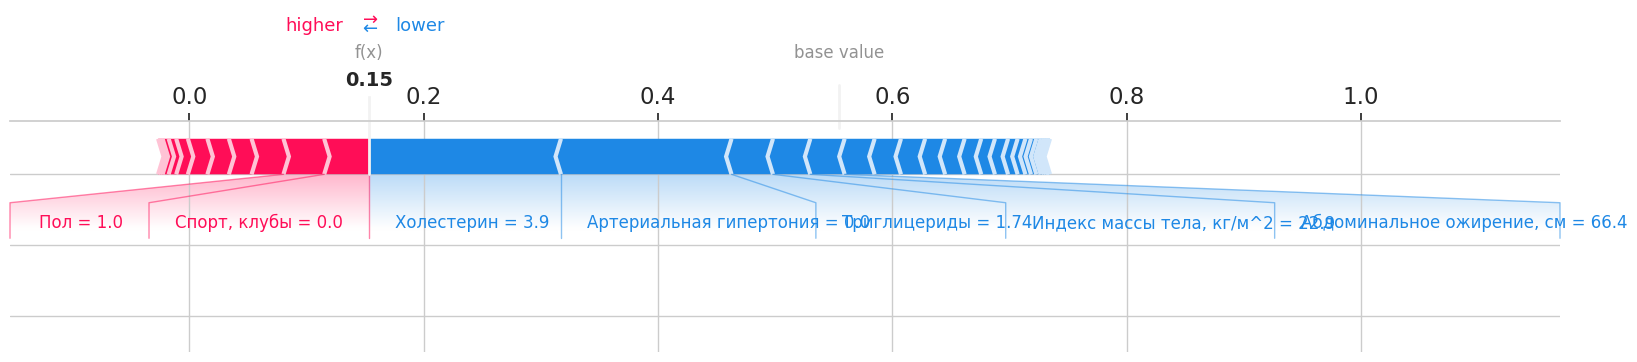

In [ ]:
# individual force plot
shap.force_plot(explainer.expected_value[1], shap_values[1][0],
                test_data[explainer.used_feats].iloc[0], matplotlib=True)


/tmp/ipython-input-1316393285.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[0], X_test)


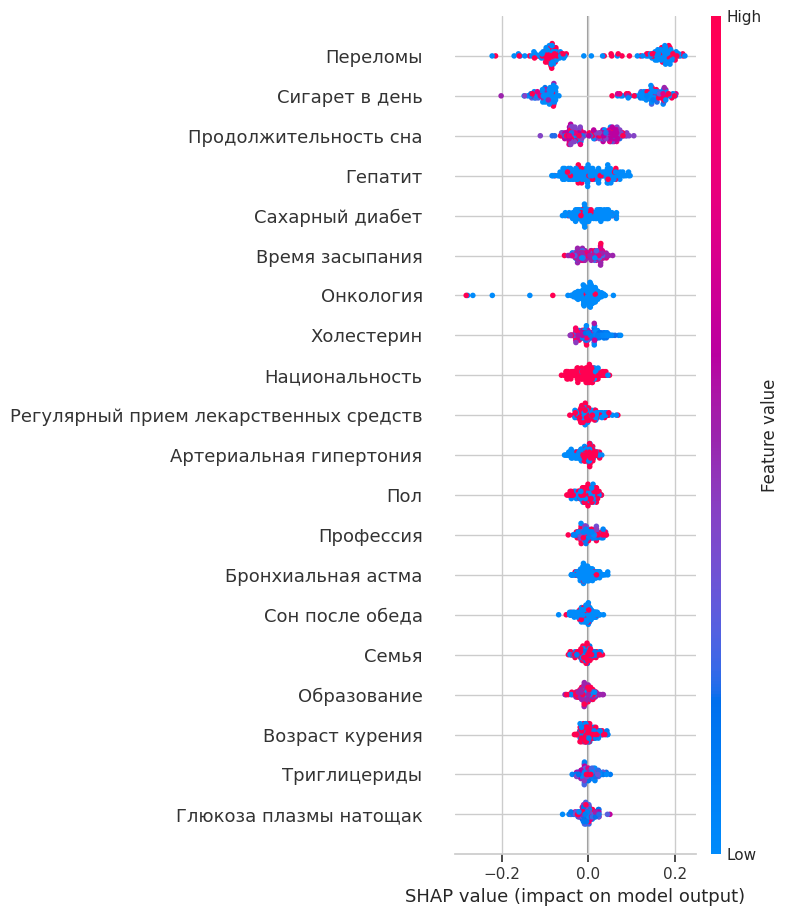

In [ ]:
shap.summary_plot(shap_values[0], X_test)

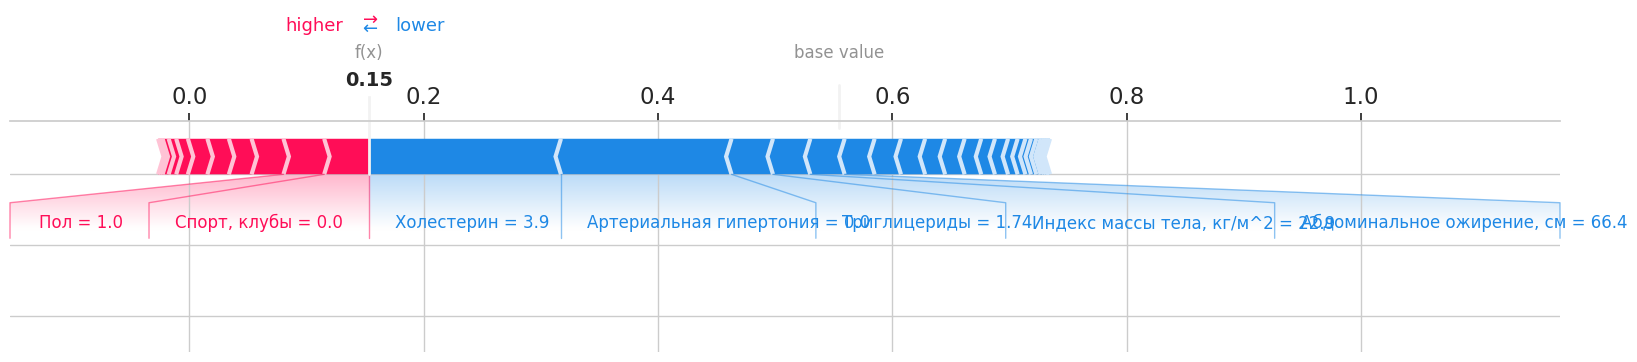

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0],
                test_data[explainer.used_feats].iloc[0], matplotlib=True)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],
                shap_values[0], X_test)

# Регрессия

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.iolib.summary2 import summary_col, summary_params

In [ ]:
table_data.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'ССЗ', 'Продолжительность сна'],
      dtype='object')

In [ ]:
# set the classification index of table
clf_index = 33

# regression variables
y_regress_target = table_data.iloc[:, clf_index] # зависимая переменная
#X_regressors = add_constant(table_data[['Работа','ЛПВП','Холестерин', 'Религия', 'Продолжительность сна', 'Артериальная гипертония', 'Сахарный диабет']]) # regressors

#X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

X_regressors = add_constant(table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:])
X_regressors.head(n=7)

,const,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,Продолжительность сна
0,1.0,0,18.0,1,0,6,0.97,0,4.0,0,...,0,10,0,20.0,3,25.1,0,799.035538,136.025100,-3
1,1.0,0,90.0,0,1,4,0.74,0,8.6,0,...,1,12,0,0.0,5,35.2,0,799.078379,224.056407,-7
2,1.0,0,17.0,0,0,7,1.57,0,5.2,0,...,0,11,0,0.0,5,19.0,0,799.055423,224.035858,-3
3,1.0,0,13.0,1,0,7,0.68,0,4.9,1,...,0,11,0,10.0,3,31.6,0,85.000523,136.065663,-3
4,1.0,0,16.0,0,1,6,1.01,0,8.2,1,...,0,11,0,0.0,3,32.8,1,799.076099,72.024040,-4
5,1.0,0,35.0,0,0,6,1.47,0,4.0,0,...,0,11,0,0.0,5,24.6,0,799.003531,224.019159,-4
6,1.0,0,90.0,1,1,5,1.54,0,3.9,0,...,0,11,0,0.0,2,19.7,0,799.074573,89.091824,-5


In [ ]:
# regression model
regression_model = sm.OLS(endog=y_regress_target, exog=X_regressors)
# подгонка модели с поправкой на гетероскедастичность
report_regression_model = regression_model.fit(cov_type='HC3')
# report
print(report_regression_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                    ССЗ   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
No. Observations:                 949   F-statistic:                     890.7
Covariance Type:                  HC3   Prob (F-statistic):               0.00
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3972      0.166     -8.417      0.000      -1.723      -1.072
Бронхиальная астма                         0.0024      0.024      0.099      0.921      -0.045       0.050
Возраст алког                             -0.0002      0.000     -0.817      0.414      -0.001       0.000
Работа                                    -0.0004      0.022     -0.01

In [ ]:
# Коэфициенты модели с округлением до 3-х десятичных знаков
report_regression_model.params.round(3)

,0
const,-1.397
Бронхиальная астма,0.002
Возраст алког,-0.000
Работа,-0.000
Переломы,0.017
Время пробуждения,0.464
ЛПВП,0.256
Выход на пенсию,0.007
Холестерин,0.056
Артериальная гипертония,0.401


# Домашнее задание

1) создать ноутбук в Google Colab

2) загрузить из репозитория курса https://github.com/AI-is-out-there/2025-biomed-upskill/tree/main/datasets дата-сет heart3.csv

3) провести классификацию данных по целевому признаку "ССЗ"

4) оценить точность модели классификации, рассчитав метрики качества Accuracy, F1, Recall, Precision

5) оценить вклад параметров (фич) модели на целевую переменную

6) построить линейную регрессионную модель по признаку "ССЗ"

7) оценить влияние компонент регрессоров

Для проверки задания Вам необходимо:

1) ...